## Use-case demonstration of oocgcm grid objects

- **author** : Julien Le Sommer
- **date** : May 2016
- **purpose** : This notebook is used for testing/debugging oocgcm grid objects during the development process.

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from oocgcm.oceanmodels.nemo import grids

In [5]:
#- Parameter
coordfile  = '/Users/lesommer/data/NATL60/NATL60-I/NATL60_coordinates_v4.nc'
maskfile = '/Users/lesommer/data/NATL60/NATL60-I/NATL60_v4.1_cdf_byte_mask.nc'
filenatl60 = '/Users/lesommer/data/NATL60/NATL60-MJM155-S/1d/2008/NATL60-MJM155_y2008m01.1d_BUOYANCYFLX.nc'

#chunks = (3454,5422)
chunks = (1727,2711)
xr_chunks = {'x': chunks[-1], 'y': chunks[-2]}
xr_chunks_t = {'x': chunks[-1], 'y': chunks[-2],'time_counter':1}

In [6]:
#- creating the grid object
grd = grids.nemo_2d_grid(nemo_coordinate_file=coordfile,nemo_byte_mask_file=maskfile,chunks=xr_chunks)

### with a 2D input xarray dataarray at a given time

In [7]:
#- defining a 2D xarray
sig0 = xr.open_dataset(filenatl60,chunks=xr_chunks,lock=False)['vosigma0'][20]

In [8]:
#- compute the horizontal gradient
gx,gy = grd.horizontal_gradient(sig0)

In [9]:
%time g = gx.load()

CPU times: user 1.05 s, sys: 1.31 s, total: 2.36 s
Wall time: 5.59 s


### with a 2D + time input xarray dataarray

In [10]:
#- defining a 2D xarray
sig0 = xr.open_dataset(filenatl60,chunks=xr_chunks_t,lock=False)['vosigma0']

In [11]:
#- compute the horizontal gradient
gx,gy = grd.horizontal_gradient(sig0)

In [12]:
%time g = gx[20].load()

CPU times: user 1.07 s, sys: 966 ms, total: 2.04 s
Wall time: 3.5 s


### Compute a laplacian

In [13]:
lap = grd.horizontal_laplacian(sig0)
%time l = lap[20].load()

CPU times: user 2.94 s, sys: 4.08 s, total: 7.01 s
Wall time: 19.5 s


### plotting the output array

/Users/lesommer/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


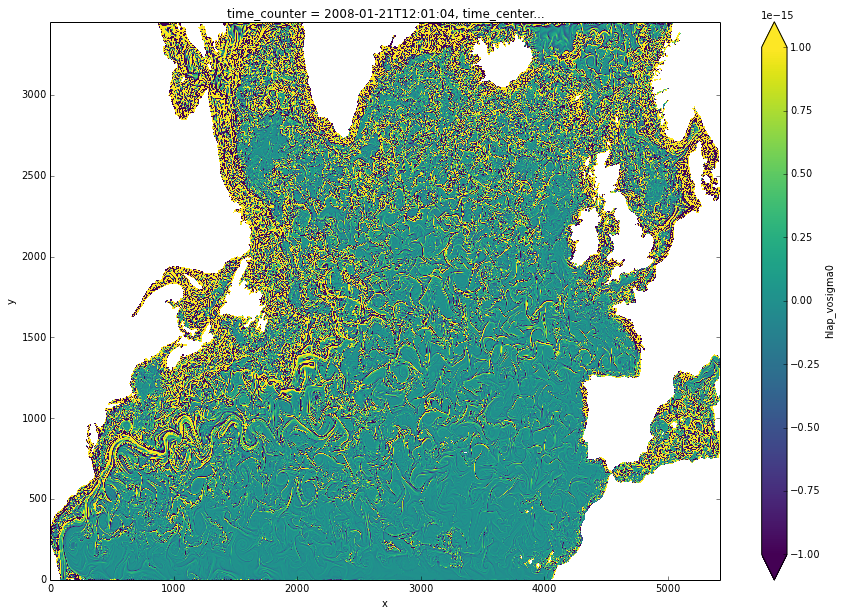

In [14]:
#- plot the horizontal gradient
plt.figure(figsize=(15,10))
l.plot.pcolormesh(vmin=-1e-15,vmax=1e-15)